# Spectral clustering for MINST dataset 
$N$: number of data points

$K$: number of clusters


## Road Map##
1. Input data and label
2. Compute similarity matrix $M$ with some kernel (say, Gaussian kernel), apply some thereshold to get adjacency matrix $W$
3. Compute the Laplacian matrix $L=D-W$ of the graph (every node represents one data point)
4. Find the eigenvectors corresponding to the $K$ minimal eigenvalues of $L$ and construct matrix $H$ ($N$ × $K$)
5. Apply K-means algrithm to classify rows of $H$

In [ ]:
def similarity_matrix(X):
  N=len(X)
  W = np.zeros([N,N])
  for i in range(N):
    for j in [x for x in range(N) if x != i]:
      temp = np.inner( (X[i]-X[j]), (X[i]-X[j]))*VAL
      W[i,j] = np.exp(-temp/2)
  return W

In [ ]:
def laplacian_matrix(X):
  W=similarity_matrix(X)
  D = np.zeros([N,N])
  I=np.identity(N)
  for i in range(N):
    for j in range(N):
      D[i,i] = D[i,i]+W[i,j]
      D[i,i]=D[i,i]**(-0.5)
  L = I - D @ W @ D 
  return L

def H_constrcution(X):
  H = np.zeros([K,N])
  
  L = laplacian_matrix(X)
  EV,V = np.linalg.eig(L)
  V = np.real(V)
  EV=np.abs(EV)
  idx = EV.argsort()  
  EV = EV[idx]
  V = V[:,idx]
  plt.plot(range(100),EV[0:100], 'rx')
  H = V[:, :K] #first K vects
  return H

In [ ]:
def K_means_clustering_standard_SED(X,K):
    """
    Performs K-means-clustering with standard squared Euclidean distance
    Input : X : dataset (N : number samples x m : size of data/element)
            K : numbers of clusters  
    output : centroids : list with 
    centroids : list of element
    clusters : list of list of the indexes of each cluster 
    """
    
    N=len(X)
    random.seed(1000) #since we use random, we are going to set a seed,... not necessary
    centroids_index = random.sample(range(N), K)#Initialize centroids
    centroids=X[centroids_index]
    clusters = asign_clusters(centroids,X,K) #asign to cluster
    new_centroids=update_centroids(clusters,X,K) 

    number_it=1
    while loss(centroids,clusters,X,K)!= loss(new_centroids,asign_clusters(new_centroids,X,K),X,K): #while the centroids change, then (1) is improving by construction , we can also use > instead
        centroids=new_centroids.copy() #copy, python basic = to copy isn't enougth
        clusters = asign_clusters(centroids,X,K) #asign to cluster
        new_centroids=update_centroids(clusters, X,K)
        number_it +=1

    
    print("Iterations numbers " + str(number_it))

    return centroids


def loss(centroids,clusters,X,K):
    """
    Calculate loss : with squared euclidean distance
    Input : 
            centroids and clusters to compute loss from
            X : dataset 
            K : numbers of clusters  
    output : squared euclidean distance : L(X,k)=sum sum || Xi - Cl ||^2
    """
    loss=0
    for l in range(K):
        for i in clusters[l]:
            loss+=np.inner(X[i]-centroids[l],X[i]-centroids[l])
    return loss

def update_centroids(clusters, X,K):
    """
    update the new centroids computing the mean on clusters 
    """
    new_centroids=[]#placeholder
    for l in range(K):
        new_centroids.append(sommer(X[clusters[l]])/len(clusters[l]) ) #sommer is a function that compute the vector sum of a list of vectors
    return new_centroids

def asign_clusters(centroids,X,K): 
    """
    For each centroids, we asign each element of X in it's corresponding cluster
    We do the argmin of the standard squared euclidian norm 
    """
    clusters=[[] for i in range(K)] #placeholder
    for i in range(len(X)): 
        sed=[np.inner(X[i]-centroids[j],X[i]-centroids[j]) for j in range(K)] #for each element xi of X, sed is the distance from each centroids
        clusters[np.argmin(sed)].append(i)
    return clusters

def sommer(list_of_list):
    """
    Compute the vector sum of a list of vectors
    """
    Somme= [0]*len(list_of_list[0]) #placeholder, nul vector
    for i in range(len(list_of_list)):
        Somme=np.add(list_of_list[i],Somme)
    return Somme


In [ ]:
#Compute the accuracy of the clustering
def accuracy(cluster,y,k):
  acc=0
  card=0
  
  for l in range(k):
    #find the mk
    mk= most_freq_digit(y[cluster[l]],k)
    print('The '+str(l)+'th cluster corresponds to the number '+str(mk))
    for element in y[cluster[l]]:
      if int(element) == mk :
        acc+=1
      card +=1
  return acc/card

  return mk
  
def most_freq_digit(liste,k):
  compteur=[0]*k
  for element in liste:
    element=int(element)
    compteur[element] += 1
  max_elem=max(compteur) 
  index=compteur.index(max_elem)
  return index

## Parameters and dataset

In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
X_original, y_original = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Iterations numbers 49


NameError: ignored

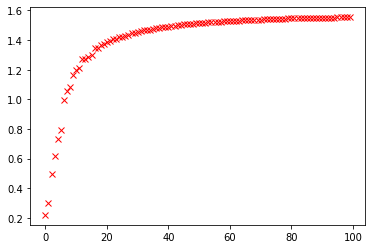

In [ ]:
N=10000

VAL=9e-10
X=X_original.values[0:N]
y=y_original.values[0:N]
K=10 #numbers of clusters

k=K
H = H_constrcution(X)
centroids=K_means_clustering_standard_SED(H,K)
clusters = asign_clusters(centroids,H,K) #cluster result


## Results

In [ ]:
print("Using the normalized standard clustering with gaussian kernel on our dataset we were able to get an accuracy of " + str(accuracy(clusters,y,K)))

The 0th cluster corresponds to the number 9
The 1th cluster corresponds to the number 2
The 2th cluster corresponds to the number 1
The 3th cluster corresponds to the number 8
The 4th cluster corresponds to the number 4
The 5th cluster corresponds to the number 3
The 6th cluster corresponds to the number 6
The 7th cluster corresponds to the number 1
The 8th cluster corresponds to the number 7
The 9th cluster corresponds to the number 0
Using the normalized standard clustering with gaussian kernel on our dataset we were able to get an accuracy of 0.5924


<Figure size 432x288 with 0 Axes>

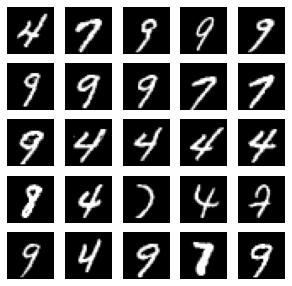

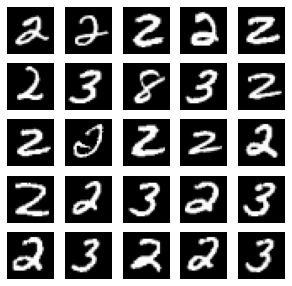

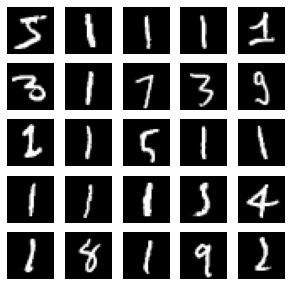

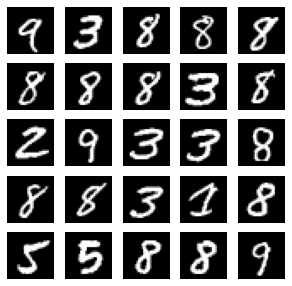

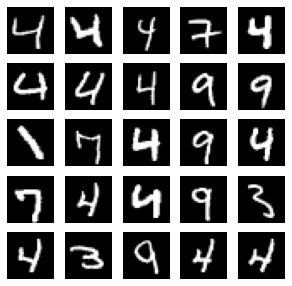

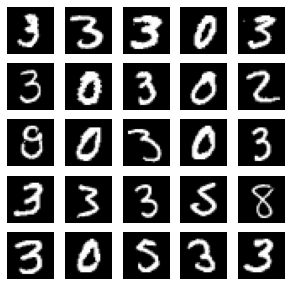

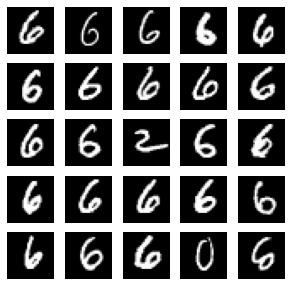

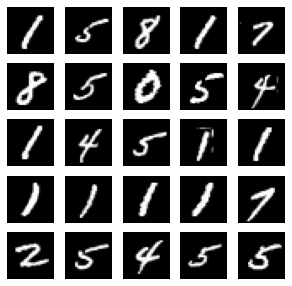

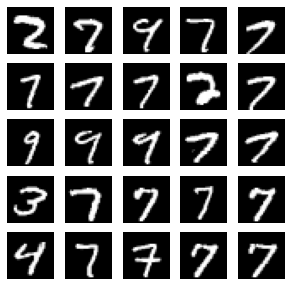

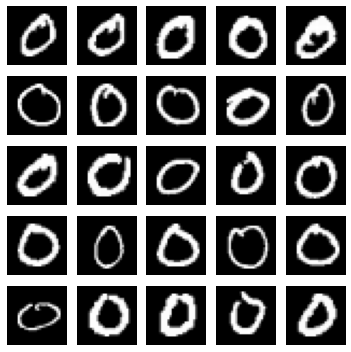

The 0th cluster corresponds to the number 9
The 1th cluster corresponds to the number 2
The 2th cluster corresponds to the number 1
The 3th cluster corresponds to the number 8
The 4th cluster corresponds to the number 4
The 5th cluster corresponds to the number 3
The 6th cluster corresponds to the number 6
The 7th cluster corresponds to the number 1
The 8th cluster corresponds to the number 7
The 9th cluster corresponds to the number 0
Using the normalized standard clustering with gaussian kernel on our dataset we were able to get an accuracy of 0.5924


In [ ]:
for L in range(K):
  plt.figure(L)
  
  fig, axs = plt.subplots(5, 5, figsize=(5, 5))
  X_l=X[clusters[L]]
  for i in range(min(len(X_l),25)): #so if a clusters is too small, we do not enconter a problem trying to go beyond what is in the cluster
      ax = axs[i // 5][i % 5]
      ax.imshow(X_l[i].reshape(28,28), cmap='gray') 
      ax.axis('off')
      ax.axis('off')
plt.tight_layout()
plt.show()

#print the accuracy
print("Using the normalized standard clustering with gaussian kernel on our dataset we were able to get an accuracy of " + str(accuracy(clusters,y,K)))